In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Cargar el JSON
with open('pedidos.json', 'r') as f:
    data = json.load(f)

In [16]:
# Convertir a DataFrame y expandir la columna "products"
df = pd.json_normalize(data, record_path='products', meta=['order_id', 'customer', 'city', 'date'])

In [28]:
df

,name,price,quantity,order_id,customer,city,date,total
0,Laptop,1200,1,101,Ana Lopez,Madrid,2023-05-15,1200
1,Mouse,25,2,101,Ana Lopez,Madrid,2023-05-15,50
2,Telefono,800,1,102,Carlos Barrera,San carlos,2023-05-16,800
3,Cargador,15,1,102,Carlos Barrera,San carlos,2023-05-16,15
4,Tablet,300,1,103,Maria Gomez,Monteria,2023-05-17,300
5,Funda,20,1,103,Maria Gomez,Monteria,2023-05-17,20


In [20]:
# Calcular el total por producto
df['total']= df['price'] * df['quantity']

In [22]:
# Convertir la fecha a tipo datetime
df['date'] = pd.to_datetime(df['date'])

In [26]:
print('DataFrame inicial: ')
print(df.head())

DataFrame inicial: 
       name  price  quantity order_id        customer        city       date  \
0    Laptop   1200         1      101       Ana Lopez      Madrid 2023-05-15   
1     Mouse     25         2      101       Ana Lopez      Madrid 2023-05-15   
2  Telefono    800         1      102  Carlos Barrera  San carlos 2023-05-16   
3  Cargador     15         1      102  Carlos Barrera  San carlos 2023-05-16   
4    Tablet    300         1      103     Maria Gomez    Monteria 2023-05-17   

   total  
0   1200  
1     50  
2    800  
3     15  
4    300  


In [46]:
# Ventas totales por producto
ventas_por_producto = df.groupby('name')['total'].sum().reset_index()

In [48]:
# Ventas por ciudad
ventas_por_ciudad = df.groupby("city")["total"].sum().reset_index()

In [50]:
# Productos más vendidos (por cantidad)
productos_mas_vendidos = df.groupby('name')['quantity'].sum().sort_values(ascending=False).reset_index()

In [36]:
print('\nVentas por producto:')
print(ventas_por_producto)


Ventas por producto:
       name  total
0  Cargador     15
1     Funda     20
2    Laptop   1200
3     Mouse     50
4    Tablet    300
5  Telefono    800


In [40]:
# Configurar estilo
sns.set_theme(style='whitegrid')
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0, 0.5, 'Productos')

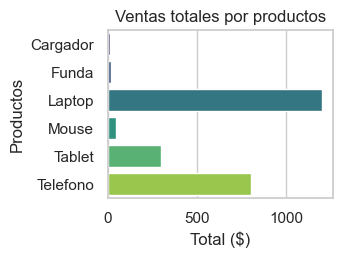

In [42]:
# Grafico 1: Ventas por producto (Barras horizontales)
plt.subplot(2, 2, 1)
sns.barplot(data= ventas_por_producto, y='name', x='total', hue='name', palette='viridis')
plt.title('Ventas totales por productos')
plt.xlabel('Total ($)')
plt.ylabel('Productos')

Text(0.5, 1.0, 'Distribuccion de ventas por ciudad')

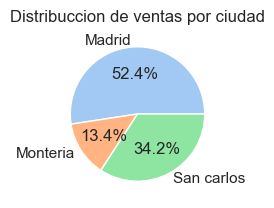

In [52]:
# Grafico 2: Distribuccion de ventas por ciudad (Tarta)
plt.subplot(2,2,2)
plt.pie(
    ventas_por_ciudad['total'],
    labels=ventas_por_ciudad['city'],
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel')
)
plt.title('Distribuccion de ventas por ciudad')

Text(0, 0.5, 'Producto')

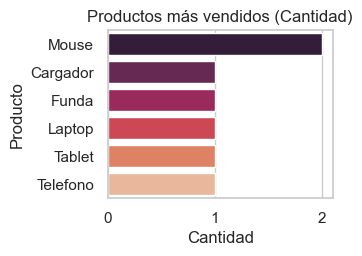

In [54]:
# Gráfico 3: Productos más vendidos (Cantidad)
plt.subplot(2,2,3)
sns.barplot(data=productos_mas_vendidos, x='quantity', y='name', hue='name', palette='rocket')
plt.title('Productos más vendidos (Cantidad)')
plt.xlabel('Cantidad')
plt.ylabel('Producto')

<function matplotlib.pyplot.show(close=None, block=None)>

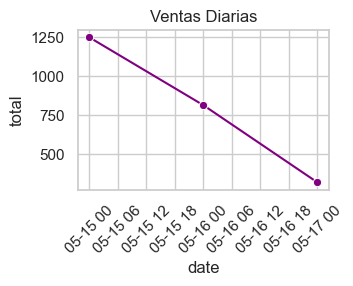

In [58]:
# Gráfico 4: Ventas a lo largo del tiempo (Líneas)
plt.subplot(2,2,4)
df_fecha = df.groupby('date')['total'].sum().reset_index()
sns.lineplot(data=df_fecha, x='date', y='total', marker='o', color='purple')
plt.title('Ventas Diarias')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show